<a href="https://colab.research.google.com/github/sanjeev29/EVA-4/blob/master/S9/s9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/models/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/models


# Import Libraries

In [2]:
%matplotlib inline
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

!pip install albumentations

     |████████████████████████████████| 634kB 14.6MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=b9f5d8565f32b5590538ebaff7856948b9c8b4f61f18b22171c55deb4b534df8
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


# Import loader

* Initialize train and test loaders from train and test dataset respectively

* CUDA check

In [3]:
from utils import loader

# Initialize CIFAR-10 classes
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck') 

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


# Plot training images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


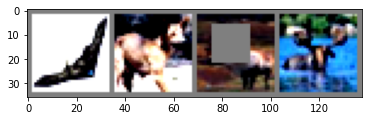

In [4]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(loader.trainloader_for_plot_alb)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Import model

Initialize network for the model

In [0]:
from resnet import ResNet18

# Model parameters

In [6]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f"Device: {device}")
net = ResNet18().to(device)
summary(net, input_size=(3, 32, 32))

Device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
           Dropout-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
        BasicBlock-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
      BatchNorm2d-10           [-1, 64, 32, 32]             128
          Dropout-11           [-1, 64, 32, 32]               0
           Conv2d-12           [-1, 64, 32, 32]          36,864
      BatchNorm2d-13           [-1, 64, 32, 32]             128
       BasicBlock-14      

# Loss function and optimizer



In [0]:
import torch.nn as nn
import torch.optim as optim

from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0001)
scheduler = StepLR(optimizer, step_size=6, gamma=0.5)

# Training and Testing

In [0]:
from utils import train
from utils import test

# Training and testing our model

In [9]:
epochs = 20
last_epoch = False

for epoch in range(epochs):
  train.train(net, device, loader.trainloader_alb, optimizer, criterion, epoch)
  scheduler.step()
  if epoch == epochs - 1:
    last_epoch = True
  test.test(net, device, loader.testloader, criterion, last_epoch)

Epoch= 0 Loss=1.0283129215240479 Batch_id=781 Accuracy=47.17: 100%|██████████| 782/782 [00:59<00:00, 13.11it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0177, Accuracy: 6075/10000 (60.75%)



Epoch= 1 Loss=1.2316405773162842 Batch_id=781 Accuracy=64.72: 100%|██████████| 782/782 [01:00<00:00, 12.82it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0128, Accuracy: 7247/10000 (72.47%)



Epoch= 2 Loss=0.8675656914710999 Batch_id=781 Accuracy=72.40: 100%|██████████| 782/782 [01:01<00:00, 12.71it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0116, Accuracy: 7471/10000 (74.71%)



Epoch= 3 Loss=0.956059992313385 Batch_id=781 Accuracy=76.56: 100%|██████████| 782/782 [01:02<00:00, 12.48it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0096, Accuracy: 7977/10000 (79.77%)



Epoch= 4 Loss=0.7276321649551392 Batch_id=781 Accuracy=79.40: 100%|██████████| 782/782 [01:02<00:00, 12.57it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0106, Accuracy: 7764/10000 (77.64%)



Epoch= 5 Loss=0.3667929768562317 Batch_id=781 Accuracy=81.10: 100%|██████████| 782/782 [01:01<00:00, 12.72it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0079, Accuracy: 8256/10000 (82.56%)



Epoch= 6 Loss=0.48959237337112427 Batch_id=781 Accuracy=85.29: 100%|██████████| 782/782 [01:02<00:00, 12.55it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0069, Accuracy: 8523/10000 (85.23%)



Epoch= 7 Loss=0.7876561880111694 Batch_id=781 Accuracy=86.50: 100%|██████████| 782/782 [01:02<00:00, 12.61it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0065, Accuracy: 8643/10000 (86.43%)



Epoch= 8 Loss=0.9781307578086853 Batch_id=781 Accuracy=87.26: 100%|██████████| 782/782 [01:01<00:00, 12.70it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0061, Accuracy: 8717/10000 (87.17%)



Epoch= 9 Loss=0.280438095331192 Batch_id=781 Accuracy=87.97: 100%|██████████| 782/782 [01:02<00:00, 12.61it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0061, Accuracy: 8709/10000 (87.09%)



Epoch= 10 Loss=0.0676085352897644 Batch_id=781 Accuracy=88.49: 100%|██████████| 782/782 [01:01<00:00, 12.61it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0067, Accuracy: 8601/10000 (86.01%)



Epoch= 11 Loss=0.3826747238636017 Batch_id=781 Accuracy=89.49: 100%|██████████| 782/782 [01:02<00:00, 12.57it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0060, Accuracy: 8723/10000 (87.23%)



Epoch= 12 Loss=0.25004082918167114 Batch_id=781 Accuracy=91.42: 100%|██████████| 782/782 [01:01<00:00, 12.64it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0054, Accuracy: 8856/10000 (88.56%)



Epoch= 13 Loss=0.5152571201324463 Batch_id=781 Accuracy=92.32: 100%|██████████| 782/782 [01:02<00:00, 12.57it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0054, Accuracy: 8877/10000 (88.77%)



Epoch= 14 Loss=0.23400673270225525 Batch_id=781 Accuracy=92.40: 100%|██████████| 782/782 [01:01<00:00, 12.66it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0057, Accuracy: 8870/10000 (88.70%)



Epoch= 15 Loss=0.11084707081317902 Batch_id=781 Accuracy=92.84: 100%|██████████| 782/782 [01:02<00:00, 12.59it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0057, Accuracy: 8888/10000 (88.88%)



Epoch= 16 Loss=0.078632652759552 Batch_id=781 Accuracy=93.28: 100%|██████████| 782/782 [01:01<00:00, 12.67it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0058, Accuracy: 8860/10000 (88.60%)



Epoch= 17 Loss=0.32700222730636597 Batch_id=781 Accuracy=93.25: 100%|██████████| 782/782 [01:02<00:00, 12.58it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0055, Accuracy: 8917/10000 (89.17%)



Epoch= 18 Loss=0.36802470684051514 Batch_id=781 Accuracy=94.55: 100%|██████████| 782/782 [01:01<00:00, 12.62it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0051, Accuracy: 8971/10000 (89.71%)



Epoch= 19 Loss=0.10609880089759827 Batch_id=781 Accuracy=94.89: 100%|██████████| 782/782 [01:02<00:00, 12.57it/s]



Validation set: Average loss: 0.0054, Accuracy: 8961/10000 (89.61%)



# Result visualization

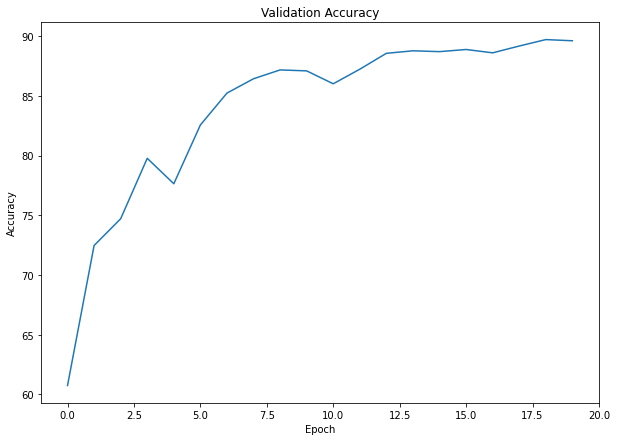

In [10]:
val_acc_fig, axs = plt.subplots(1,1,figsize=(10,7))
axs.set_xlim([-1, 20])
axs.plot(test.test_acc)
axs.set_title("Validation Accuracy")
axs.set_xlabel("Epoch")
axs.set_ylabel("Accuracy")
val_acc_fig.savefig('/content/gdrive/My Drive/Colab Notebooks/S8/validation_accuracy_change_plot.jpg')

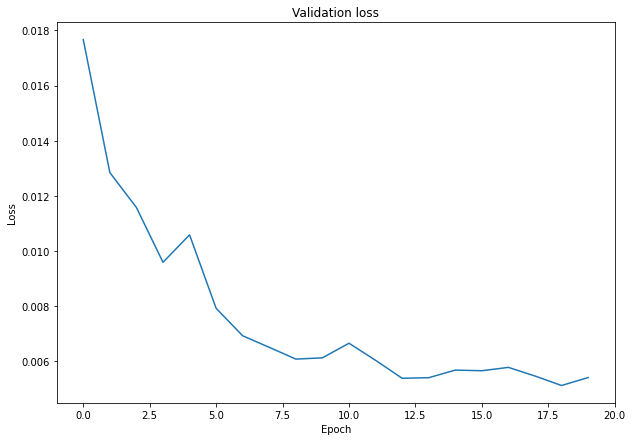

In [11]:
val_loss_fig, axs = plt.subplots(1,1,figsize=(10,7))
axs.set_xlim([-1, 20])
axs.plot(test.test_losses)
axs.set_title("Validation loss")
axs.set_xlabel("Epoch")
axs.set_ylabel("Loss")
val_loss_fig.savefig('/content/gdrive/My Drive/Colab Notebooks/S8/validation_loss_change_plot.jpg')

# Actual outputs

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:    dog  deer   dog   dog


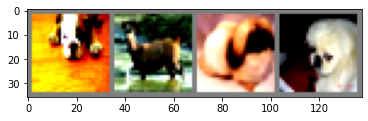

In [15]:
dataiter = iter(loader.testloader_for_plot)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Predicted outputs

In [17]:
outputs = net(images.cuda())
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    dog horse   dog   dog


# Performance of CIFAR-10 classes


In [18]:
test.test_class_performance(net, device, loader.testloader, classes)

100%|██████████| 157/157 [00:03<00:00, 41.54it/s]

Accuracy of plane : 86 %
Accuracy of   car : 94 %
Accuracy of  bird : 92 %
Accuracy of   cat : 86 %
Accuracy of  deer : 87 %
Accuracy of   dog : 80 %
Accuracy of  frog : 89 %
Accuracy of horse : 94 %
Accuracy of  ship : 94 %
Accuracy of truck : 97 %
